In [1]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

Use one unit length to represent 100nm, so one unit frequency = 1/(100nm) => c/(100nm)=3000 THz. Now $\omega_{min}$=300THz means $f_{min}$=300/(2$\pi$)THz and this translate to $f_{min}$=300/(2$\pi$)/3000 unit = 0.3/(6$\pi$) uinit. Furthermore, $\omega_{max}$=600THz => $f_{max}$=0.6/(6$\pi$) unit.

In [128]:
start_plot = True
frq_min = 0.25/(6*np.pi) 
frq_max = 1.25/(6*np.pi)
wvl_max = 1/frq_min
wvl_min = 1/frq_max
nfreq = 1000
fcen = (frq_min + frq_max)/2
df = frq_max - frq_min
dfp = 1/2

In [129]:
dpml = np.floor(0.5*wvl_max)+1

dA = 2
dB = 3
epsilonA = 12
epsilonB = 3

NAB = 1

sz = 4*dpml+(dA+dB)*NAB

resolution = 100 # pixels/μm

freg_p = 0.1
cell_size = mp.Vector3(z=sz)

pml_layers = [mp.PML(thickness=dpml)]

source_z=-sz/2+dpml
flux_reg_z=sz/2-dpml

In [130]:
def BlockAB(N, center):
    geometry = []
    for i in range(N):
        geometry = np.append(geometry, mp.Block(mp.Vector3(mp.inf,mp.inf,dA),
                     center=mp.Vector3(z=center-(dA+dB)*N/2 + (dA+dB)*i + dA/2),
                     material=mp.Medium(epsilon=epsilonA)))
        geometry = np.append(geometry, mp.Block(mp.Vector3(mp.inf,mp.inf,dB),
                     center=mp.Vector3(z=center-(dA+dB)*N/2 + (dA+dB)*i + dA + dB/2),
                     material=mp.Medium(epsilon=epsilonB)))
    geometry = geometry.tolist()
    return geometry

In [131]:
def BlockBA(N, center):
    geometry = []
    for i in range(N):
        geometry = np.append(geometry, mp.Block(mp.Vector3(mp.inf,mp.inf,dB),
                     center=mp.Vector3(z=center-(dA+dB)*N/2 + (dA+dB)*i + dB/2),
                     material=mp.Medium(epsilon=epsilonB)))
        geometry = np.append(geometry, mp.Block(mp.Vector3(mp.inf,mp.inf,dA),
                     center=mp.Vector3(z=center-(dA+dB)*N/2 + (dA+dB)*i + dB + dA/2),
                     material=mp.Medium(epsilon=epsilonA)))
    geometry = geometry.tolist()
    return geometry

In [132]:
sources = [mp.Source(mp.GaussianSource(fcen,fwidth=df),
                     component=mp.Ex,
                     center=mp.Vector3(z=source_z),
                     size=mp.Vector3())]

In [133]:
sim_vac = mp.Simulation(cell_size=cell_size,
                    resolution=resolution,
                    boundary_layers=pml_layers,
                    dimensions=1,
                    sources=sources)
tran_fr = mp.FluxRegion(center=mp.Vector3(z=flux_reg_z))
tran = sim_vac.add_flux(fcen, df*dfp, nfreq, tran_fr)

In [134]:
pt = mp.Vector3(z=flux_reg_z)
sim_vac.run(until_after_sources=mp.stop_when_fields_decayed(50,mp.Ex,mp.Vector3(z=0),1e-3))

-----------
Initializing structure...
time for choose_chunkdivision = 0.00250983 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 157 with resolution 100
time for set_epsilon = 0.0177429 s
-----------
field decay(t = 50.005): 7.957636837758343e-10 / 7.957636837758343e-10 = 1.0
field decay(t = 100.01): 0.008412536735237598 / 0.008412536735237598 = 1.0
field decay(t = 150.01500000000001): 0.2500004117359742 / 0.2500004117359742 = 1.0
field decay(t = 200.02): 0.05848705938590039 / 0.2500004117359742 = 0.23394785224461412
field decay(t = 250.025): 2.5092770949987e-07 / 0.2500004117359742 = 1.0037091849467638e-06
run 0 finished at t = 250.025 (50005 timesteps)


In [135]:
vac_flux = mp.get_fluxes(tran)
flux_freqs = mp.get_flux_freqs(tran)

In [136]:
sim = mp.Simulation(cell_size=cell_size,
                    resolution=resolution,
                    boundary_layers=pml_layers,
                    sources=sources,
                    dimensions=1,
                    geometry=BlockAB(NAB,0))
tran_fr = mp.FluxRegion(center=mp.Vector3(z=flux_reg_z))
tran = sim.add_flux(fcen, df*dfp, nfreq, tran_fr)

In [137]:
pt = mp.Vector3(z=flux_reg_z)

sim.run(until_after_sources=mp.stop_when_fields_decayed(50,mp.Ex,mp.Vector3(z=0),1e-3))

-----------
Initializing structure...
time for choose_chunkdivision = 0.00229406 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 157 with resolution 100
     block, center = (0,0,-1.5)
          size (1e+20,1e+20,2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (0,0,1)
          size (1e+20,1e+20,3)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (3,3,3)
time for set_epsilon = 0.0237551 s
-----------
field decay(t = 50.005): 2.2684848748117025e-12 / 2.2684848748117025e-12 = 1.0
field decay(t = 100.01): 0.00025088782800192656 / 0.00025088782800192656 = 1.0
field decay(t = 150.01500000000001): 0.06742661912897592 / 0.06742661912897592 = 1.0
field decay(t = 200.02): 0.044117900901471385 / 0.06742661912897592 = 0.6543098478225813
field decay(t = 250.025): 4.703221092811522e-05 / 0.06742661912897592 = 0.0006975317988011592
run 0 finished at t = 250.025 (50005 times

In [138]:
if start_plot:
    wl=[]
    Ts=[]

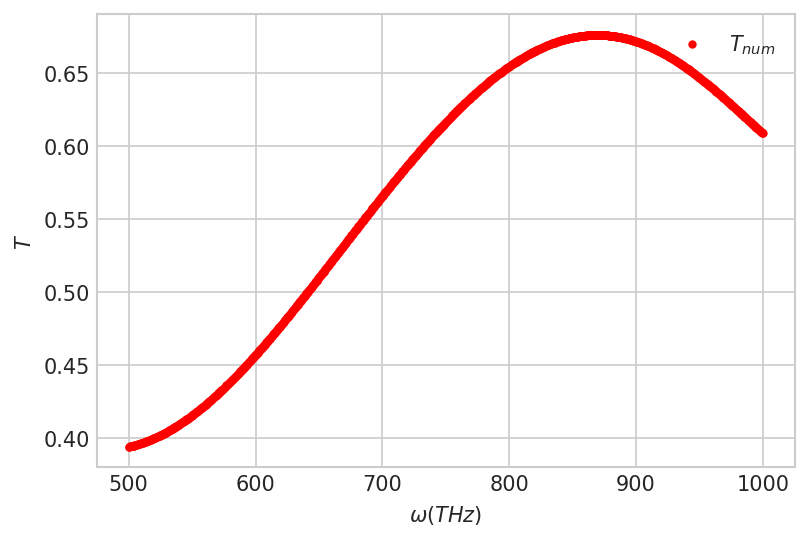

In [139]:
tran_flux = mp.get_fluxes(tran)

for i in range(nfreq):
    wl = np.append(wl, 2*flux_freqs[i]*np.pi*3*10**3)
    Ts = np.append(Ts,tran_flux[i]/vac_flux[i])    

if mp.am_master():
    plt.figure(dpi=150)
    plt.style.use('seaborn-whitegrid')
    plt.plot(wl,Ts,'r.',label='$T_{num}$')
    plt.xlabel(r'$\omega(THz)$')
    plt.ylabel('$T$')
    plt.legend(loc="upper right")
    plt.savefig('Tasks_2_2(500-1000).png')
    plt.show()    

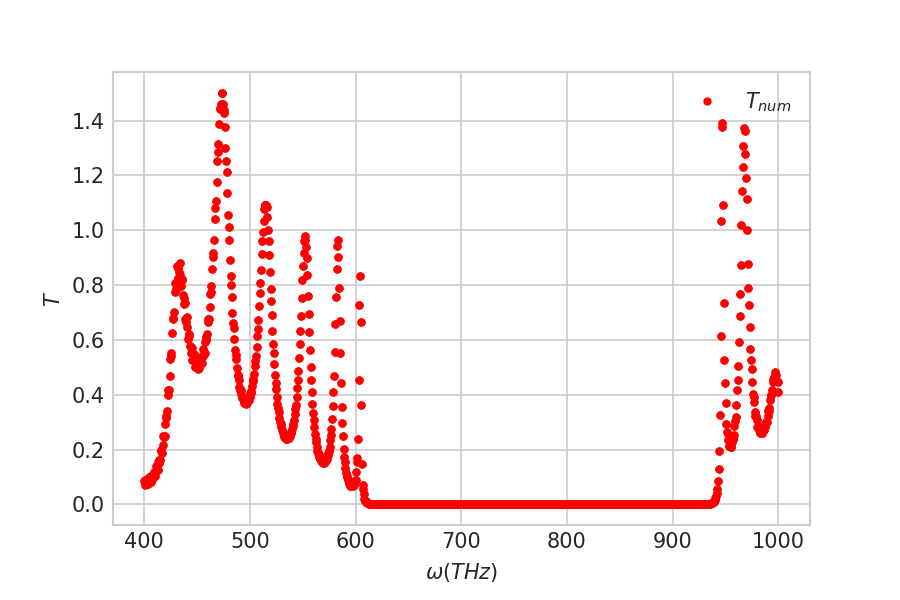

In [140]:
wvl_min

15.079644737231009

In [141]:
-0.5*sz+dpml

-40.5

In [142]:
sz

157.0

In [143]:
dpml

38.0